In [1]:
import os

from collections import defaultdict

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from Standard_functions import get_user_split_data, plot_fit_score_pred,fit_score_pred_G_NB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, f1_score
import copy

import warnings

warnings.filterwarnings('always') 

In [2]:
os.chdir('../Data/')

# Old categorical feature handling
Combining dummies for most and least correlating features.

In [3]:
df = pd.read_pickle('full_features_with_dep')

In [4]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df, val_size=.2, seed=42)
print('Gaussian Naive Bayes:')
fit_score_pred_G_NB(X_tr, X_val, y_tr, y_val)

Gaussian Naive Bayes:
Our f1-score is 0.40140522135135276
And we've predicted 1483477 non-re-orders and 212202 re-orders.


## ROC AUC

In [5]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df)

In [6]:
clf = GaussianNB(var_smoothing=1e-9)
clf.fit(X_tr, y_tr)
probabilities = clf.predict_proba(X_val)[:,1]


In [7]:
fpr, tpr, thresholds = roc_curve(y_val,probabilities)

ROC AUC score =  0.7950174703006965


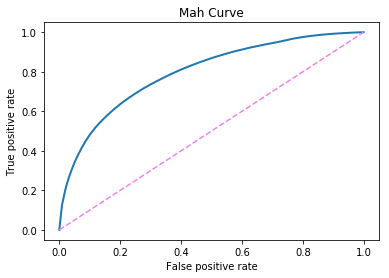

In [8]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Mah Curve');
print("ROC AUC score = ", roc_auc_score(y_val, probabilities))

## Messing with thresholds

In [9]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df)

In [10]:
clf = GaussianNB(var_smoothing=1e-9)
clf.fit(X_tr, y_tr)
probabilities = clf.predict_proba(X_val)[:,1]


In [11]:
roc_auc_score(y_val,probabilities)

0.7950174703006965

In [12]:
fpr, tpr, thresholds = roc_curve(y_val,probabilities)

In [13]:
probs = pd.DataFrame(probabilities)
probs.columns = ['score']
test = copy.deepcopy(probs)

In [14]:
threshold = np.linspace(.1,.9,40)
dict_thresholdf1 = dict()

for i in threshold:
    test = copy.deepcopy(probs)
    conditions = [
    (test.score > i),
    (test.score < i)
    ]
    choices = [1,0]
    test.score = np.select(conditions, choices)
    dict_thresholdf1[i] = f1_score(y_val,test)

dict_thresholdf1

{0.1: 0.3886742395238579,
 0.12051282051282051: 0.3920549789284597,
 0.14102564102564102: 0.394679821632071,
 0.16153846153846155: 0.39653065549598454,
 0.18205128205128207: 0.3980830993875291,
 0.20256410256410257: 0.39870655942472244,
 0.2230769230769231: 0.39943153556455624,
 0.24358974358974358: 0.39999616264623916,
 0.2641025641025641: 0.4005878372971125,
 0.2846153846153846: 0.4010022484459271,
 0.30512820512820515: 0.40136074603692606,
 0.32564102564102565: 0.40157562763331756,
 0.34615384615384615: 0.4016110269417372,
 0.3666666666666667: 0.4017333286085279,
 0.38717948717948714: 0.4017520019783957,
 0.4076923076923077: 0.4017369300377515,
 0.42820512820512824: 0.4016870401124005,
 0.4487179487179487: 0.4016575518634468,
 0.46923076923076923: 0.40142994522724423,
 0.4897435897435898: 0.4013222897265026,
 0.5102564102564102: 0.4014502864632883,
 0.5307692307692308: 0.4013888077186681,
 0.5512820512820513: 0.40113431847433095,
 0.5717948717948718: 0.400898652021967,
 0.5923076923